In [ ]:
Prompt:generate sysmlv2 code for a ugv vehicle



In [1]:
#Gemini 1.0 output
model UGVVehicle {
  vehicle {
    type UGV
    name "UGV1"
    location {
      x 0.0
      y 0.0
    }
  }

  system {
    name "UGVSystem"
    component {
      name "Camera"
      capability {
        name "TakePicture"
        parameter {
          name "FileName"
          type String
        }
        result {
          name "Picture"
          type Picture
        }
      }
    }
    component {
      name "Motor"
      capability {
        name "Drive"
        parameter {
          name "Speed"
          type Float
        }
        parameter {
          name "Heading"
          type Float
        }
      }
    }
    component {
      name "Sensor"
      capability {
        name "DetectObject"
        parameter {
          name "Range"
          type Float
        }
        result {
          name "DetectedObjects"
          type Object[]
        }
      }
    }
  }

  bridge {
    from "camera" to "Camera"
    from "motor" to "Motor"
    from "sensor" to "Sensor"
  }
}

ERROR:no viable alternative at input 'UGVVehicle' (1.sysml line : 1 column : 7)
ERROR:no viable alternative at input 'UGV' (1.sysml line : 3 column : 10)
ERROR:no viable alternative at input 'name' (1.sysml line : 4 column : 5)
ERROR:no viable alternative at input '"UGV1"' (1.sysml line : 4 column : 10)
ERROR:no viable alternative at input '0' (1.sysml line : 6 column : 9)
ERROR:no viable alternative at input '0' (1.sysml line : 7 column : 9)
ERROR:no viable alternative at input '"UGVSystem"' (1.sysml line : 12 column : 10)
ERROR:no viable alternative at input '"Camera"' (1.sysml line : 14 column : 12)
ERROR:no viable alternative at input '"TakePicture"' (1.sysml line : 16 column : 14)
ERROR:no viable alternative at input '"FileName"' (1.sysml line : 18 column : 16)
ERROR:no viable alternative at input 'String' (1.sysml line : 19 column : 16)
ERROR:no viable alternative at input '}' (1.sysml line : 20 column : 9)
ERROR:no viable alternative at input '"Picture"' (1.sysml line : 22 colum

In [2]:
#Claude 2.0
package UGV {

  block UGV {
    value speed: Real // m/s
    value heading: Real // radians
  
    port drive {
      flow speed: Real // m/s
      flow heading: Real // radians
    }
  
    constraint speed >= 0
    constraint 0 <= heading <= 2*pi
  }

  block Motor {
    value torque: Real // Nm
    flow rpm: Real // revolutions per minute
  
    port shaft {
      flow torque: Real // Nm
      flow rpm: Real // rpm 
    }
  }

  block Steering {
    value angle: Real // radians
  
    port steer {
      flow angle: Real // radians
    }
  }

  block Controller {
    value targetSpeed: Real // m/s
    value targetHeading: Real // radians
  
    port cmdSpeed {
      flow targetSpeed: Real // m/s 
    }
  
    port cmdHeading {
      flow targetHeading: Real // radians
    }
  }

  UGV ugv1 {
    drive <-> motor1.shaft
    drive <-> motor2.shaft
    drive <-> steering1.steer
  }
  
  Motor motor1 {
    shaft -> ugv1.drive
  }
  
  Motor motor2 {
    shaft -> ugv1.drive
  }
  
  Steering steering1 {
    steer -> ugv1.drive
  }
  
  Controller controller1 {
    cmdSpeed -> ugv1.drive
    cmdHeading -> ugv1.drive
  }

}


ERROR:no viable alternative at input 'package' (2.sysml line : 2 column : 1)
ERROR:no viable alternative at input 'UGV' (2.sysml line : 4 column : 9)
ERROR:no viable alternative at input 'speed' (2.sysml line : 5 column : 11)
ERROR:no viable alternative at input 'value' (2.sysml line : 5 column : 18)
ERROR:no viable alternative at input 'value' (2.sysml line : 6 column : 5)
ERROR:no viable alternative at input 'port' (2.sysml line : 6 column : 20)
ERROR:no viable alternative at input 'port' (2.sysml line : 8 column : 5)
ERROR:no viable alternative at input 'flow' (2.sysml line : 9 column : 19)
ERROR:no viable alternative at input 'flow' (2.sysml line : 10 column : 7)
ERROR:no viable alternative at input '}' (2.sysml line : 10 column : 21)
ERROR:no viable alternative at input '}' (2.sysml line : 11 column : 5)
ERROR:no viable alternative at input '>=' (2.sysml line : 13 column : 22)
ERROR:no viable alternative at input '0' (2.sysml line : 14 column : 5)
ERROR:no viable alternative at in

In [6]:
# With 45 pages from SysMLv2 spec, Create a ugv 
package UGV_control_system {
  item def Person;
  part def Vehicle {
    ref part driver[0..1] : Person;
    part engine : Engine;
    part wheels[4] : Wheel;
  }
  part def Engine {
    attribute def power : Real;
    attribute def torque : Real;
    attribute def rpm : Real;
  }
  part def Wheel {
    attribute def radius : Real;
    attribute def width : Real;
  }
}

ERROR:Couldn't resolve reference to Type 'Real'. (6.sysml line : 9 column : 24)
ERROR:Couldn't resolve reference to Type 'Real'. (6.sysml line : 10 column : 25)
ERROR:Couldn't resolve reference to Type 'Real'. (6.sysml line : 11 column : 22)
ERROR:Couldn't resolve reference to Type 'Real'. (6.sysml line : 14 column : 24)
ERROR:Couldn't resolve reference to Type 'Real'. (6.sysml line : 15 column : 23)
ERROR:An attribute must be typed by attribute definitions. (6.sysml line : 9 column : 5)
ERROR:An attribute must be typed by attribute definitions. (6.sysml line : 10 column : 5)
ERROR:An attribute must be typed by attribute definitions. (6.sysml line : 11 column : 5)
ERROR:An attribute must be typed by attribute definitions. (6.sysml line : 14 column : 5)
ERROR:An attribute must be typed by attribute definitions. (6.sysml line : 15 column : 5)


In [9]:
package UGV_control_system {
  import ScalarValues::Real;

  item def Person;
  part def Vehicle {
    ref part driver[0..1] : Person;
    part engine : Engine;
    part wheels[4] : Wheel;
  }
  part def Engine {
    attribute  power : Real;
    attribute  torque : Real;
    attribute rpm : Real;
  }
  part def Wheel {
    attribute  radius : Real;
    attribute  width : Real;
  }
}

Package UGV_control_system (0904c27d-81b6-43b4-abe1-7cf2c4b01d17)


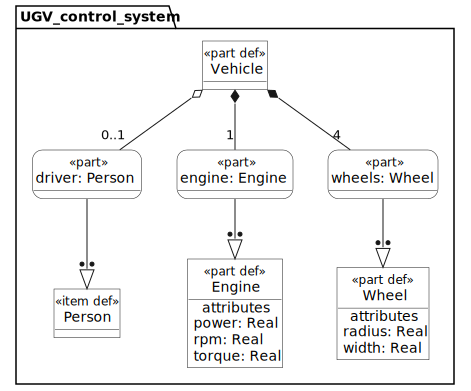

In [10]:
%viz --view=tree UGV_control_system